In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yadiraespinoza/world-happiness-2015-2024")

print("Path to dataset files:", path)

Path to dataset files: /Users/matthewfischer/.cache/kagglehub/datasets/yadiraespinoza/world-happiness-2015-2024/versions/7


/Users/matthewfischer/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd

combined_path = path + "/world_happiness_combined.csv"
happiness = pd.read_csv(combined_path, sep=";")

In [4]:
happiness.head()

,Ranking,Country,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Switzerland,Western Europe,"7,58700","8,26132","0,96240",73,"0,99379","0,37289","0,23941",2015
1,2,Iceland,Western Europe,"7,56100","7,70416","1,00000",73,"0,93884","0,54819","0,74371",2015
2,3,Denmark,Western Europe,"7,52700","7,84114","0,97030",70,"0,96962","0,42894","0,12382",2015
3,4,Norway,Western Europe,"7,52200","8,63100","0,94917",71,"1,00000","0,43598","0,33860",2015
4,5,Canada,North America and ANZ,"7,42700","7,84595","0,94322",71,"0,94511","0,57560","0,40285",2015


In [5]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ranking                       1502 non-null   int64 
 1   Country                       1502 non-null   object
 2   Regional indicator            1499 non-null   object
 3   Happiness score               1502 non-null   object
 4   GDP per capita                1502 non-null   object
 5   Social support                1502 non-null   object
 6   Healthy life expectancy       1502 non-null   int64 
 7   Freedom to make life choices  1502 non-null   object
 8   Generosity                    1502 non-null   object
 9   Perceptions of corruption     1502 non-null   object
 10  Year                          1502 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 129.2+ KB


In [6]:
happiness.describe()

,Ranking,Healthy life expectancy,Year
count,1502.000000,1502.000000,1502.000000
mean,76.035286,66.670439,2019.374834
std,43.865013,7.671376,2.856316
min,1.000000,39.000000,2015.000000
25%,38.000000,62.000000,2017.000000
50%,76.000000,68.000000,2019.000000
75%,114.000000,72.000000,2022.000000
max,158.000000,85.000000,2024.000000


In [7]:
def decimal_format(dataframe, column_name):
    dataframe[column_name] = (
        dataframe[column_name].astype(str).str.replace(",", ".").astype(float)
    )
    return dataframe


happiness = decimal_format(happiness, "Happiness score")
happiness = decimal_format(happiness, "GDP per capita")
happiness = decimal_format(happiness, "Social support")
happiness = decimal_format(happiness, "Freedom to make life choices")
happiness = decimal_format(happiness, "Generosity")
happiness = decimal_format(happiness, "Perceptions of corruption")

In [8]:
import numpy as np

print(happiness.isna().sum())
missing_regional = happiness[happiness["Regional indicator"].isna()]
print(missing_regional)

Ranking                         0
Country                         0
Regional indicator              3
Happiness score                 0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
dtype: int64
     Ranking Country Regional indicator  Happiness score  GDP per capita  \
394       87  Greece                NaN           5.2270         6.89283   
673       49  Cyprus                NaN           6.0458         7.50051   
743      120  Gambia                NaN           4.5163         1.82777   

     Social support  Healthy life expectancy  Freedom to make life choices  \
394         0.76955                       71                       0.14543   
673         0.75329                       77                       0.64287   
743         0.57836                       66                       0.60555

In [9]:
def update_country_regions(dataframe):
    country_regions = {}
    for country in dataframe["Country"].unique():
        latest_row = (
            dataframe[dataframe["Country"] == country].sort_values("Year").iloc[-1]
        )
        country_regions[country] = latest_row["Regional indicator"]

    for i, country in enumerate(dataframe["Country"]):
        if country in country_regions:
            dataframe.loc[i, "Regional indicator"] = country_regions[country]

    return dataframe


happines = update_country_regions(happiness)

In [10]:
print(happiness.isna().sum())

Ranking                         0
Country                         0
Regional indicator              0
Happiness score                 0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Year                            0
dtype: int64


In [11]:
def check_duplicates(dataframe):
    return int(dataframe.duplicated().sum())


print(check_duplicates(happiness))

0


In [12]:
def year_range(dataframe, years):
    return {year: dataframe[dataframe["Year"] == year] for year in years}


years = range(2015, 2025)
years_df = year_range(happiness, years)


def group_by_regions(dataframe):
    regions = []
    for i in dataframe["Regional indicator"]:
        if not (i in regions):
            regions.append(i)
    return {
        region: dataframe[dataframe["Regional indicator"] == region]
        for region in regions
    }


regions_df = group_by_regions(happiness)

In [13]:
summary_year_region = happiness.groupby(["Year", "Regional indicator"])[
    "Happiness score"
].agg(["count", "mean", "std"])
print(summary_year_region)

                                         count      mean       std
Year Regional indicator                                           
2015 Central and Eastern Europe             15  5.383200  0.587595
     Commonwealth of Independent States     11  5.231545  0.617432
     East Asia                               7  5.519000  0.579832
     Latin America and Caribbean            22  6.144682  0.728560
     Middle East and North Africa           24  5.319833  1.041073
...                                        ...       ...       ...
2024 North America and ANZ                   4  6.927625  0.151606
     South Asia                              6  3.895700  1.177119
     Southeast Asia                          8  5.603525  0.816648
     Sub-Saharan Africa                     35  4.354306  0.725003
     Western Europe                         23  6.835591  0.486218

[100 rows x 3 columns]


In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


def train_tree_model(df, target):
    if df.empty:
        raise ValueError("Input dataframe is empty")
    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in dataframe")

    X = df.drop(columns=[target])
    y = df[target]
    if X.empty or y.empty:
        raise ValueError("Features or target are empty")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_model.fit(X_train, y_train)
    return tree_model, X_test, y_test


tree_model, X_test, y_test = train_tree_model(
    happiness[
        [
            "GDP per capita",
            "Social support",
            "Healthy life expectancy",
            "Freedom to make life choices",
            "Generosity",
            "Perceptions of corruption",
            "Happiness score",
        ]
    ],
    "Happiness score",
)

y_pred = tree_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Decision Tree Performance")
print("R² score:", r2)
print("RMSE:", rmse)

Decision Tree Performance
R² score: 0.7291202154888567
RMSE: 0.5508171058006723


In [16]:
tree_simplified, X_test_simplified, y_test_simplified = train_tree_model(
    happiness[["GDP per capita", "Social support", "Happiness score"]],
    "Happiness score",
)


# X_simplified = happiness[["GDP per capita", "Social support"]]

# X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = (
#    train_test_split(X_simplified, y, test_size=0.2)
# )

# tree_simplified = DecisionTreeRegressor(max_depth=5)
# tree_simplified.fit(X_train_simplified, y_train_simplified)

y_pred_simplified = tree_simplified.predict(X_test_simplified)

print("R² (2 features):", r2_score(y_test_simplified, y_pred_simplified))
print(
    "RMSE (2 features):",
    np.sqrt(mean_squared_error(y_test_simplified, y_pred_simplified)),
)

R² (2 features): 0.6619848146859113
RMSE (2 features): 0.6153004419042488


In [17]:
tree_life_exp, X_test_life_exp, y_test_life_exp = train_tree_model(
    happiness[
        [
            "GDP per capita",
            "Social support",
            "Freedom to make life choices",
            "Generosity",
            "Perceptions of corruption",
            "Healthy life expectancy",
        ]
    ],
    "Healthy life expectancy",
)

# y_life_exp = happiness["Healthy life expectancy"]
# X_life_exp = happiness[["GDP per capita", "Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Healthy life expectancy"]]

# X_train_life_exp, X_test_life_exp, y_train_life_exp, y_test_life_exp = train_test_split(
#     X_life_exp, y_life_exp, test_size=0.2
# )

# tree_life_exp = DecisionTreeRegressor(max_depth=5)
# tree_life_exp.fit(X_train_life_exp, y_train_life_exp)

y_pred_life_exp = tree_life_exp.predict(X_test_life_exp)

print("R² (predicting life expectancy):", r2_score(y_test_life_exp, y_pred_life_exp))

R² (predicting life expectancy): 0.597567753685986


Text(0.5, 1.0, 'Generosity vs Social Support')

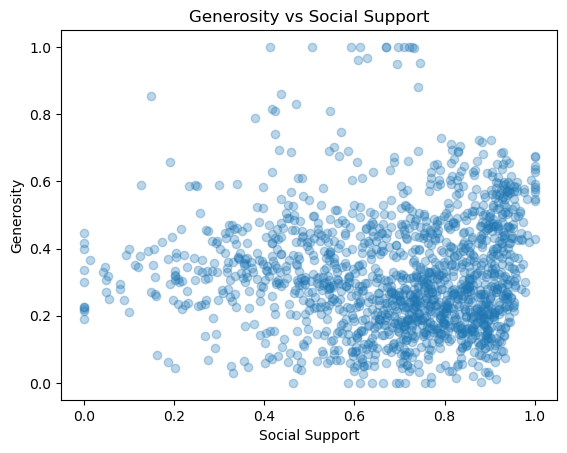

In [18]:
import matplotlib.pyplot as plt

generosity = happiness["Generosity"]
social_support = happiness["Social support"]
plt.scatter(social_support, generosity, alpha=0.3)
plt.xlabel("Social Support")
plt.ylabel("Generosity")
plt.title("Generosity vs Social Support")

Text(0.5, 1.0, 'Happiness Score vs GDP Per Capita')

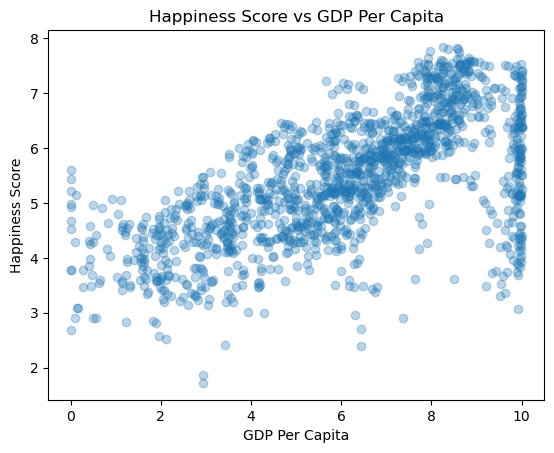

In [19]:
gdp_per_capita = happiness["GDP per capita"]
happiness_score = happiness["Happiness score"]
plt.scatter(gdp_per_capita, happiness_score, alpha=0.3)
plt.xlabel("GDP Per Capita")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs GDP Per Capita")

Text(0.5, 1.0, 'Happiness Score vs Social Support')

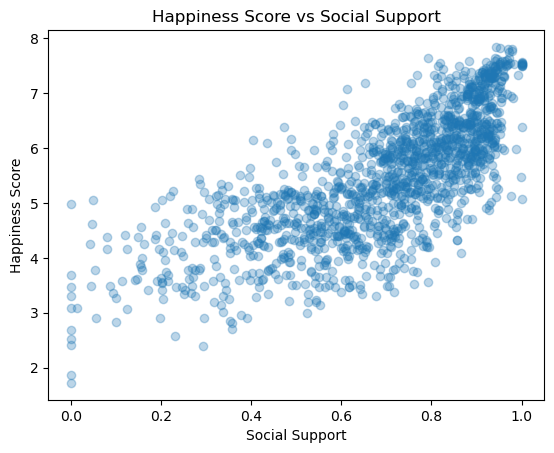

In [20]:
plt.scatter(social_support, happiness_score, alpha=0.3)
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs Social Support")

Text(0.5, 1.0, 'Happiness Score vs Generosity')

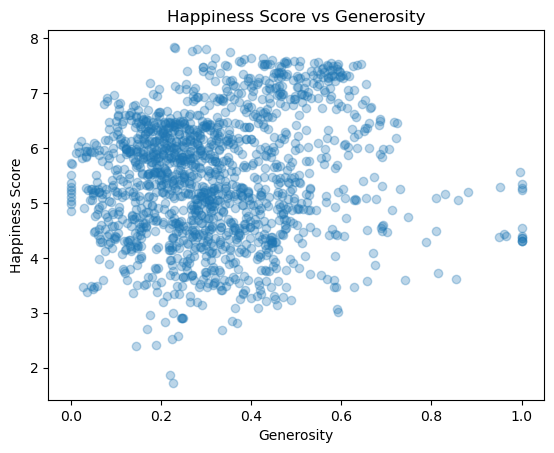

In [21]:
plt.scatter(generosity, happiness_score, alpha=0.3)
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs Generosity")

In [23]:
import unittest


class TestDecimalFormat(unittest.TestCase):
    def test_integer_and_float_strings(self):
        df = pd.DataFrame({"col": ["1234", "567,89"]})
        result = decimal_format(df.copy(), "col")
        self.assertTrue(np.issubdtype(result["col"].dtype, np.floating))
        self.assertAlmostEqual(result["col"].iloc[0], 1234.0)
        self.assertAlmostEqual(result["col"].iloc[1], 567.89)

    def test_already_float(self):
        df = pd.DataFrame({"col": [1.23, 4.56]})
        result = decimal_format(df.copy(), "col")
        self.assertTrue(np.allclose(result["col"], [1.23, 4.56]))


class TestUpdateCountryRegions(unittest.TestCase):
    def test_updates_to_latest_region(self):
        df = pd.DataFrame(
            {
                "Country": ["A", "A", "B"],
                "Regional indicator": ["X", "Y", "Z"],
                "Year": [2000, 2005, 2001],
            }
        )
        updated = update_country_regions(df.copy())
        # "A" should have region "Y" (latest year)
        self.assertTrue(
            (updated.loc[updated["Country"] == "A", "Regional indicator"] == "Y").all()
        )

    def test_no_change_when_consistent(self):
        df = pd.DataFrame(
            {
                "Country": ["C", "C"],
                "Regional indicator": ["M", "M"],
                "Year": [2000, 2001],
            }
        )
        updated = update_country_regions(df.copy())
        self.assertTrue((updated["Regional indicator"] == "M").all())


class TestCheckDuplicates(unittest.TestCase):
    def test_no_duplicates(self):
        df = pd.DataFrame({"id": [1, 2, 3]})
        self.assertEqual(check_duplicates(df), 0)

    def test_with_duplicates(self):
        df = pd.DataFrame({"id": [1, 2, 2, 3, 3, 3]})
        self.assertEqual(check_duplicates(df), 3)


class TestYearRange(unittest.TestCase):
    def test_valid_range(self):
        df = pd.DataFrame({"Year": [2000, 2001, 2002, 2003], "val": [1, 2, 3, 4]})
        filtered = year_range(df, range(2001, 2003))
        self.assertEqual(set(filtered.keys()), {2001, 2002})
        self.assertTrue((filtered[2001]["Year"] == 2001).all())

    def test_empty_for_missing_years(self):
        df = pd.DataFrame({"Year": [2000, 2001], "val": [5, 6]})
        filtered = year_range(df, [2010])
        self.assertIn(2010, filtered)
        self.assertEqual(len(filtered[2010]), 0)


class TestGroupByRegions(unittest.TestCase):
    def test_grouping(self):
        df = pd.DataFrame(
            {"Regional indicator": ["Asia", "Asia", "Europe"], "Value": [10, 20, 30]}
        )
        grouped = group_by_regions(df)
        self.assertIn("Asia", grouped)
        self.assertEqual(grouped["Asia"]["Value"].sum(), 30)

    def test_empty_dataframe(self):
        df = pd.DataFrame(columns=["Regional indicator", "Value"])
        grouped = group_by_regions(df)
        self.assertEqual(grouped, {})


class TestTrainTreeModel(unittest.TestCase):
    def test_model_training_and_prediction(self):
        df = pd.DataFrame(
            {
                "feature1": [1, 2, 3, 4, 5],
                "feature2": [10, 20, 30, 40, 50],
                "target": [0.1, 0.2, 0.3, 0.4, 0.5],
            }
        )
        model, X_test, y_test = train_tree_model(df, "target")
        self.assertIsInstance(model, DecisionTreeRegressor)
        preds = model.predict(X_test)
        self.assertEqual(len(preds), len(y_test))

    def test_raises_on_empty_dataframe(self):
        df = pd.DataFrame(columns=["feature1", "target"])
        with self.assertRaises(ValueError):
            train_tree_model(df, "target")

    def test_raises_on_missing_target(self):
        df = pd.DataFrame({"feature1": [1, 2], "feature2": [3, 4]})
        with self.assertRaises(ValueError):
            train_tree_model(df, "target")


class TestSystemPipeline(unittest.TestCase):
    def test_end_to_end_pipeline(self):
        df = pd.DataFrame(
            {
                "Country": ["A", "A", "B"],
                "Regional indicator": ["X", "Y", "Z"],
                "Year": [2000, 2005, 2001],
                "Value": ["1,234", "2,345", "3,456"],
                "target": [10, 20, 30],
            }
        )

        df = decimal_format(df, "Value")

        df = update_country_regions(df)

        self.assertEqual(check_duplicates(df), 0)

        grouped = group_by_regions(df)
        self.assertIn("Y", grouped.keys())
        self.assertIn("Z", grouped.keys())

        model, X_test, y_test = train_tree_model(df[["Value", "target"]], "target")
        preds = model.predict(X_test)

        self.assertEqual(len(preds), len(y_test))


unittest.main(argv=[""], exit=False)

..............
----------------------------------------------------------------------
Ran 14 tests in 0.012s

OK
